<a href="https://colab.research.google.com/github/NadezhdaGruzdeva/Statistics-Probability/blob/main/Statistics%26Probability_HW8_Correlation%26Covariance_%2B_Markdown_(tables)_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Полезные ссылки:**  
семинар  https://gb.ru/lessons/307310
лекция  https://www.youtube.com/watch?v=TL7UlxRwORc&ab_channel=GeekBrains  
коррел в больш видео по анализу данных в python https://youtu.be/dd3RcafdOQk?t=13327    
нелинейные связи Phik https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

###**Ковариация**  -   
величина , определяющая зависимость двух случайных величин

$cov_xy = M(X*Y)-M (X)*M(Y)$,   
где М – математическое ожидание  
np.cov(x,y, ddof = 1) - смещеная ковариация  
np.cov(x,y, ddof = 0) - несмещеная ковариация  

###**Нормированная ковариация или коэффициент Пирсона**    
$r_xy =  \frac{cov_xy}{\sigma_x * \sigma_y}$,  
где $\sigma$ - среднее квадратичное отклонение  

__np.corrcoef(x,y)  
df.corr() #pd__

###**Коэффициент корреляции Спирмена** –  
это ранговый коэффициент корреляции, также показывает тесноту линейной связи, но в отличии от коэффициента корреляции Пирсона не требует нормальности распределений случайных величин и применяется для порядковых и количественных данных. Расчитывается как коеффициент Пирсона но не по значениям, а по рангам значений.  

__stats.spearmanr(x,y)__

###**Условия применимости коэффициентов корреляции**  

| Пирсона | Спирмена |
| :---:         |     :---:      |
| параметрический метод | непараметрический метод |
| нормальность  |распределение может быть отличным от нормального|
| количественные данные	| количественные и порядковые признаки|
| отражает только линейную связь	| отражает только линейную связь|

Перед применением коэффициентов сделать проверку на U-образную кривую, так как может быть и не линейная связь.  
  
  
Нелинейную связь норм показывает **phik**  
__pip instal phik  
import phik  
from phik.report import plot_correlation_matrix  
from phik import report  
phik_overview = df.phik_matrix()__  
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()



###**Интерпретация значений коэффициента корреляции**  

| Значение | Интерпретация |
| :---         |     :---:      |
| 0,0 - 0,1 | Нет линейной связи     |
| 0,1 - 0,3  | Очень слабая |       |
| 0,3 - 0,5	| Слабая |
| 0,5 - 0,7	| Интерпретация |
| 0,7 - 0,9	| Высокая |
| 0,9 - 1,0	| Очень высокая |

###**Задача 1.**  
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy  

Полученные значения должны быть равны.  

Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.

In [ ]:
#дано
zp=np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks=np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

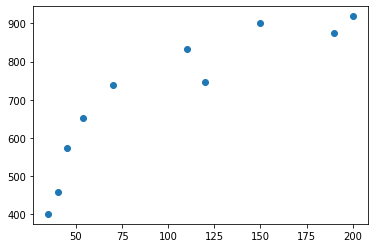

In [ ]:
plt.scatter(zp,ks)

In [ ]:
cov = np.mean(zp*ks) - np.mean(zp) * np.mean(ks)
cov

9157.839999999997

In [ ]:
np.cov(zp,ks) #несмещенная ковариация по умолчанию ddof = 1

array([[ 3882.93333333, 10175.37777778],
       [10175.37777778, 33854.32222222]])

In [ ]:
np.cov(zp,ks, ddof = 0) #смещенная ковариация

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

In [ ]:
normedCovariance = np.cov(zp,ks, ddof = 0) / (np.std(zp,ddof = 0) * np.std(ks,ddof = 0)) #Нормированная ковариация или коэффициент Пирсона
normedCovariance

array([[0.33866702, 0.88749009],
       [0.88749009, 2.95275283]])

In [ ]:
normedCovariance = np.cov(zp,ks, ddof = 1) / (np.std(zp,ddof = 1) * np.std(ks,ddof = 1)) #same value
normedCovariance

array([[0.33866702, 0.88749009],
       [0.88749009, 2.95275283]])

In [ ]:
np.corrcoef(zp,ks) #Нормированная ковариация или коэффициент Пирсона

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

By Pandas

In [ ]:
df = pd.DataFrame(
    {'zp': zp,
     'ks': ks,
    })
df

,zp,ks
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


In [ ]:
df.corr()

,zp,ks
zp,1.00000,0.88749
ks,0.88749,1.00000


###**Задача 2.**  
Измерены значения IQ выборки студентов,
обучающихся в местных технических вузах:

131, 125, 115, 122, 131, 115, 107, 99, 125, 111.

Известно, что в генеральной совокупности IQ распределен нормально.

Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [ ]:
#дано
viborka = [131, 125, 115, 122, 131, 115, 107, 99, 125, 111]
a = 0.05


**Доверительный интервал для мат ожидания при неизвестном среднекв откл ген сов-ти**  
$\bar X \pm t_\frac{a}{2}*\frac{\sigma}{\sqrt n}$


Найдем $t_\frac{a}{2}$

In [ ]:
t = stats.t.ppf (1 - a / 2, len(viborka) - 1)
t

2.2621571627409915

In [ ]:
n = len(viborka)
n 

10

In [ ]:
x = np.mean(viborka)
x

118.1

In [ ]:
q = np.std(viborka)
q

10.004498987955369

In [ ]:
LeftBoarder = x - t * q / np.sqrt(n)
LeftBoarder

110.9432125583706

In [ ]:
RightBoarder = x + t * q / np.sqrt(n)
RightBoarder

125.25678744162938

Проверка

In [ ]:
stats.t.interval(confidence = 1 - a, df = len(viborka)-1, loc = np.mean(viborka), scale=stats.sem(viborka))

(110.55608365158724, 125.64391634841274)

Есть небольшие различия

###**Задача 3.**  
Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2.  
Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [ ]:
# Дано:
dispersia = 25
n = 27
x = 174.2
a = 0.05


**Доверительный интервал для мат ожидания при известном среднекв откл ген сов-ти**  
$\bar X \pm Z_\frac{a}{2}*\frac{\sigma}{\sqrt n}$


Найдем $Z_\frac{a}{2}$

In [ ]:
z = stats.norm.ppf(1 - a / 2)
z

1.959963984540054

In [ ]:
q = np.sqrt(dispersia)
q

5.0

In [ ]:
LeftBoarder = x - z * q / np.sqrt(n)
LeftBoarder

172.3140237765397

In [ ]:
RightBoarder = x + z * q / np.sqrt(n)
RightBoarder

176.08597622346028